<h1> Text Mining Topic Modeling Akun X UGMFess
<h1> Mata Kuliah Big Data Analysis

**Kelompok 5**

Nama | NIM
--- | ---
Krismantoro Bagus Meidianto	| 22/492709/PA/21137
Nicolas Dwi Hardjoleksono		|22/493899/PA/21225
Azhar Bagaskara			| 22/502652/PA/21573
Muhammad Haikal Syafi Alawiy	| 22/503880/PA/21669
Hafizh Al Muzakar			| 22/505360/PA/21760

# Import Library

In [2]:
!pip install bertopic
!pip install sastrawi
!pip install nltk
!pip install scikit-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 150.6/150.6 kB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 77.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 68.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 50.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 11.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 6.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 40.0 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalli

In [3]:
import pandas as pd
import re
import nltk
from nltk.tokenize import word_tokenize
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
from tqdm.auto import tqdm
from wordcloud import WordCloud
import matplotlib.pyplot as plt
nltk.download('punkt_tab')

from bertopic import BERTopic
from umap import UMAP
from sklearn.cluster import KMeans
from sentence_transformers import SentenceTransformer
from bertopic.vectorizers import ClassTfidfTransformer
from hdbscan import HDBSCAN

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


In [4]:
import torch
torch.device("cuda" if torch.cuda.is_available() else "cpu")

device(type='cpu')

# Import Files

In [5]:
from google.colab import files
uploaded = files.upload()

# uploaded = 'results/tweets-ugmfess-2024-06-2025-05.csv'

Saving tweets-ugmfess-2024-06-2025-05.csv to tweets-ugmfess-2024-06-2025-05.csv


In [6]:
df = pd.read_csv(next(iter(uploaded)))
# df = pd.read_csv(uploaded)
df.head()

,tweet_id,time_created,url,username,text,likes,replies,retweets
0,1807449884502737277,2024-06-30 16:23:27+00:00,https://x.com/UGM_FESS/status/1807449884502737277,UGM_FESS,"Yujiem aku mau nanya, pacar ku tu agak susah a...",2,2,0
1,1807439803971195280,2024-06-30 15:43:24+00:00,https://x.com/UGM_FESS/status/1807439803971195280,UGM_FESS,"Luv malem"" gini rasanya butuh pacar dah",16,4,1
2,1807439388508631457,2024-06-30 15:41:45+00:00,https://x.com/UGM_FESS/status/1807439388508631457,UGM_FESS,luv punya pasangan tukang kentut. Yay or nay?,8,22,0
3,1807435970046042524,2024-06-30 15:28:10+00:00,https://x.com/UGM_FESS/status/1807435970046042524,UGM_FESS,kulak! hai guys aku ada preloved beberapa baju...,4,38,0
4,1807432528988635556,2024-06-30 15:14:30+00:00,https://x.com/UGM_FESS/status/1807432528988635556,UGM_FESS,Yujiem Ada yang minat tentang komunikasi KE3??...,2,0,0


In [7]:
print("Total Dokumen:", len(df))

Total Dokumen: 29241


# Preprocessing

In [8]:
# List Kata Gaul
spell_correction_dict = {
    "blm": "belum",
    "bs": "bisa",
    "g": "gak",
    "ga": "gak",
    "gk": "gak",
    "gg": "gak",
    "nggak": "gak",
    "ngga": "gak",
    "ngk": "gak",
    "gax": "gak",
    "gx": "gak",
    "kaga": "gak",
    "kagak": "gak",
    "ng": "gak",
    "sy": "saya",
    "ajah": "aja",
    "tdk": "tidak",
    "tdak": "tidak",
    "tak": "tidak",
    "tida": "tidak",
    "bgt": "banget",
    "bget": "banget",
    "bet": "banget",
    "yg": "yang",
    "mo": "mau",
    "apk": "aplikasi",
    "sih": "",
    "dong": "",
    "deh": "",
    "nih": "",
    "tuh": "",
    "kan": "",
    "kok": "",
    "loh": "",
    "lah": "",
    "ya": "",
    "yee": "",
    "weh": "",
    "eh": "",
    "cie": "",
    "ciee": "",
    "cieee": "",
    "anjay": "",
    "anj": "",
    "wkwk": "",
    "wkwkwk": "",
    "haha": "",
    "hehe": "",
    "huhu": "",
    "heuheu": "",
    "hadeh": "",
    "ckck": "",
    "hmm": "",
    "hm": "",
    "gitu": "",
    "gitulah": "",
    "gituan": "",
    "githu": "",
    "gimana": "bagaimana",
    "gmn": "bagaimana",
    "bro": "",
    "sis": "",
    "cuy": "",
    "sob": "",
    "gan": "",
    "min": "",
    "bang": "",
    "mbak": "",
    "mas": "",
    "om": "",
    "bos": "",
    "bu": "",
    "pak": "",
    "mom": "",
    "dad": "",
    "kak": "",
    "dek": "",
    "doi": "pacar",
    "gue": "saya",
    "gua": "saya",
    "elo": "kamu",
    "loe": "kamu",
    "elu": "kamu",
    "lu": "kamu",
    "lo": "kamu",
    "ko": "kamu",
    "yaudah": "",
    "oke": "baik",
    "ok": "baik",
    "sip": "baik",
    "yes": "ya",
    "no": "tidak",
    "yoi": "",
    "mantul": "bagus",
    "btw": "",
    "lho": "",
    "udah": "sudah",
    "lagi": "",
    "aja": ""
}

In [9]:
def correct_slang_words(text):
    words = word_tokenize(text)
    corrected_words = [spell_correction_dict.get(word.lower(), word) for word in words]
    return ' '.join(corrected_words)

df['clean_text'] = df['text'].apply(correct_slang_words)
df.head()

,tweet_id,time_created,url,username,text,likes,replies,retweets,clean_text
0,1807449884502737277,2024-06-30 16:23:27+00:00,https://x.com/UGM_FESS/status/1807449884502737277,UGM_FESS,"Yujiem aku mau nanya, pacar ku tu agak susah a...",2,2,0,"Yujiem aku mau nanya , pacar ku tu agak susah ..."
1,1807439803971195280,2024-06-30 15:43:24+00:00,https://x.com/UGM_FESS/status/1807439803971195280,UGM_FESS,"Luv malem"" gini rasanya butuh pacar dah",16,4,1,Luv malem '' gini rasanya butuh pacar dah
2,1807439388508631457,2024-06-30 15:41:45+00:00,https://x.com/UGM_FESS/status/1807439388508631457,UGM_FESS,luv punya pasangan tukang kentut. Yay or nay?,8,22,0,luv punya pasangan tukang kentut . Yay or nay ?
3,1807435970046042524,2024-06-30 15:28:10+00:00,https://x.com/UGM_FESS/status/1807435970046042524,UGM_FESS,kulak! hai guys aku ada preloved beberapa baju...,4,38,0,kulak ! hai guys aku ada preloved beberapa baj...
4,1807432528988635556,2024-06-30 15:14:30+00:00,https://x.com/UGM_FESS/status/1807432528988635556,UGM_FESS,Yujiem Ada yang minat tentang komunikasi KE3??...,2,0,0,Yujiem Ada yang minat tentang komunikasi KE3 ?...


In [1]:
tqdm.pandas()  # Enable progress_apply for pandas

stemmer = StemmerFactory().create_stemmer()
stop_factory = StopWordRemoverFactory()
stopwords = stop_factory.get_stop_words()

def preprocess(text):
    # Lowercase
    text = text.lower()
    # Remove links
    text = re.sub(r'https?://\S+', '', text)
    # Tokenization
    tokens = word_tokenize(text)
    # Remove punctuation & non-alphabet tokens
    tokens = [re.sub(r'[^a-z]', '', token) for token in tokens]
    tokens = [token for token in tokens if token.isalpha()]
    # Remove stopwords
    tokens = [token for token in tokens if token not in stopwords]
    # Stemming
    tokens = [stemmer.stem(token) for token in tokens]
    return ' '.join(tokens)

# Apply with progress bar
print("Preprocessing text...")
df['clean_text'] = df['text'].astype(str).progress_apply(preprocess)
print("Preprocessing complete!")

NameError: name 'tqdm' is not defined

In [ ]:
df.to_csv('cleaned_data.csv', index=False)

# Download the cleaned data
files.download('cleaned_data.csv')

# Data Visualization

In [12]:
clean_uploaded = files.upload()

df_cleaned = pd.read_csv(next(iter(clean_uploaded)))
# df = pd.read_csv(uploaded)
df_cleaned['clean_text'].head()

Saving cleaned_data.csv to cleaned_data.csv


,clean_text
0,yujiem aku mau nanya pacar ku tu susah active ...
1,luv malem gin rasa butuh pacar dah
2,luv punya pasang tukang kentut yay or nay
3,kulak hai guys aku preloved beberapa baju rok ...
4,yujiem minat komunikasi online dapat benefit n...


In [11]:
df_cleaned = df

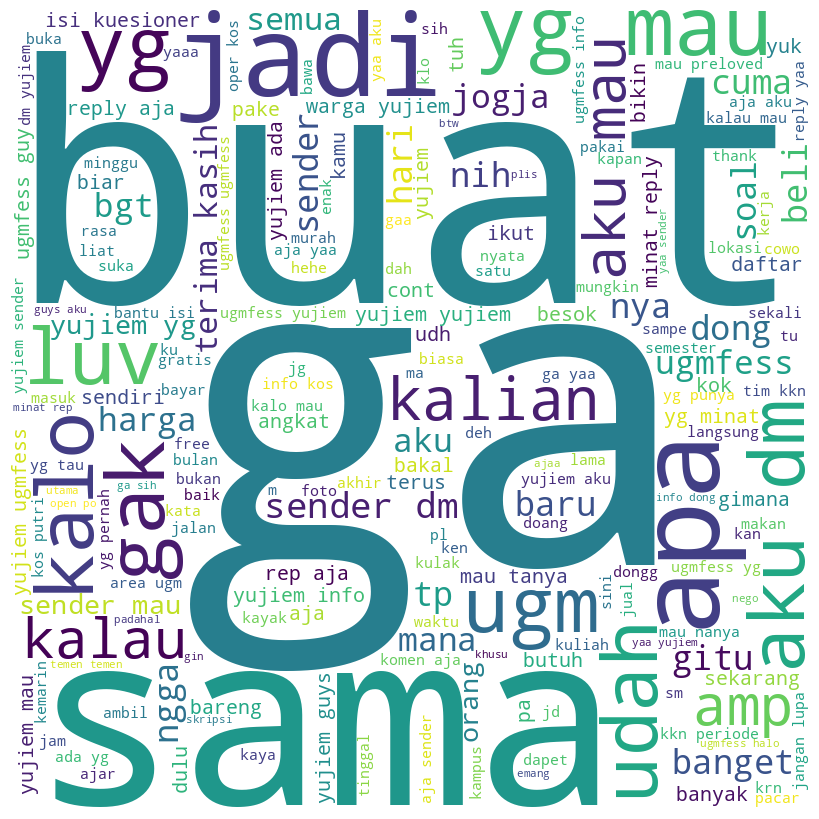

In [13]:
# Join the text data into a single string
text = " ".join(df_cleaned['clean_text'].astype(str)) # Assuming 'Tweet' is the column with text data

# Create the wordcloud
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = None, # You can add stopwords here if needed
                min_font_size = 10).generate(text)

# plot the wordcloud
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

plt.show()

# BERTopic

In [14]:
sentence_model = SentenceTransformer("all-MiniLM-L6-v2")
cluster_model = HDBSCAN(min_cluster_size=25, metric='euclidean', cluster_selection_method='eom', prediction_data=True)
umap_model = UMAP(n_neighbors=15, n_components=5, min_dist=0.0, metric='cosine')
ctfidf_model = ClassTfidfTransformer(reduce_frequent_words=True)

topic_model = BERTopic(language = "multilingual", embedding_model=sentence_model, umap_model=umap_model,
                       hdbscan_model=cluster_model, ctfidf_model=ctfidf_model, verbose=True)

# Fill any NaN values in 'clean_text' with an empty string
df_cleaned['clean_text'] = df_cleaned['clean_text'].fillna('')

topics, probs = topic_model.fit_transform(df_cleaned['clean_text'])

modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.5k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

2025-06-03 15:39:35,643 - BERTopic - Embedding - Transforming documents to embeddings.


Batches:   0%|          | 0/914 [00:00<?, ?it/s]

2025-06-03 15:53:29,019 - BERTopic - Embedding - Completed ✓
2025-06-03 15:53:29,025 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2025-06-03 15:54:45,231 - BERTopic - Dimensionality - Completed ✓
2025-06-03 15:54:45,235 - BERTopic - Cluster - Start clustering the reduced embeddings
2025-06-03 15:54:55,413 - BERTopic - Cluster - Completed ✓
2025-06-03 15:54:55,428 - BERTopic - Representation - Fine-tuning topics using representation models.
2025-06-03 15:54:56,290 - BERTopic - Representation - Completed ✓


# Hasil

In [15]:
topic_model.get_topic_info()[0:10]

,Topic,Count,Name,Representation,Representative_Docs
0,-1,11513,-1_gin_ngobrol_wa_rp,"[gin, ngobrol, wa, rp, treasury, to, satu, cai...",[urgently needed divisi ddd all klaster medika...
1,0,1143,0_puk_co_ce_temenin,"[puk, co, ce, temenin, peluk, kobar, nemenin, ...",[sender beneran ken peluk erat dipuk puk bbrp ...
2,1,1025,1_preloved_barangbarang_barang_kulak,"[preloved, barangbarang, barang, kulak, baju, ...",[yujiem aku mau preloved beberapa baju cowo al...
3,2,930,2_pawang_pacar_inisial_luv,"[pawang, pacar, inisial, luv, semangat, kak, k...",[luv abis putus sma cwo yg lbih tua thn blm pn...
4,3,902,3_dpp_matlis_verif_mkwk,"[dpp, matlis, verif, mkwk, wong, bem, gess, ge...",[gw yg kepo maba lihat donatur calon jangan sa...
5,4,867,4_under_infoin_putra_sendowo,"[under, infoin, putra, sendowo, info, ac, rang...",[yujiem info kost putri ac km udah isi daerah ...
6,5,474,5_lubang_koas_keluh_gigi,"[lubang, koas, keluh, gigi, akar, cabut, rawat...",[yujiem guys ada yg gigi lubang besar tinggal ...
7,6,409,6_semester_genap_scholarship_ganjil,"[semester, genap, scholarship, ganjil, study, ...",[main basket dapet juta serius the first high ...
8,7,405,7_foto_fotografer_studio_fotocopy,"[foto, fotografer, studio, fotocopy, ijazah, b...",[temen yg lihat map ijazah sekitar sini ga yaa...
9,8,383,8_tempat_nugas_tempe_service,"[tempat, nugas, tempe, service, digicam, saran...",[yujiem rekomendasiin tempat nugas lama dong b...


In [16]:
topic_model.get_topic(0)

[('puk', np.float64(0.14748094929014027)),
 ('co', np.float64(0.1318338569949598)),
 ('ce', np.float64(0.1278122671960688)),
 ('temenin', np.float64(0.12333670170407673)),
 ('peluk', np.float64(0.11905830890640785)),
 ('kobar', np.float64(0.117788365316049)),
 ('nemenin', np.float64(0.11760442758760128)),
 ('misa', np.float64(0.11579384418852987)),
 ('nugas', np.float64(0.11017126603059992)),
 ('nonton', np.float64(0.10129398670137518))]

📈 Top 10 Cluster Stability


,Topic,Stability
0,0,0.950337
1,1,0.430045
11,11,0.238009
6,6,0.211604
5,5,0.202746
4,4,0.079573
13,13,0.063966
15,15,0.039967
14,14,0.032706
10,10,0.031048


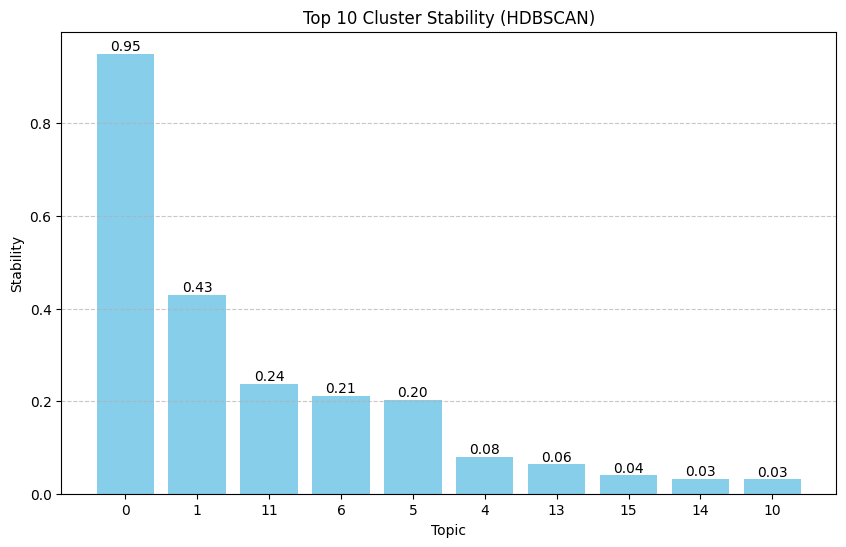

In [36]:
# Ambil informasi dari model
cluster_persistence = topic_model.hdbscan_model.cluster_persistence_
labels = topic_model.hdbscan_model.labels_

# Hanya ambil topik unik (tanpa noise -1)
valid_indices = labels != -1
unique_topics = sorted(list(set(labels[valid_indices])))
stability_per_topic = cluster_persistence

# Create DataFrame
cluster_stability_df = pd.DataFrame({
    "Topic": unique_topics,
    "Stability": stability_per_topic
}).sort_values(by="Stability", ascending=False)

# Tampilkan Top 10
print("📈 Top 10 Cluster Stability")
display(cluster_stability_df.head(10))

# Visualisasi Bar Chart
top10 = cluster_stability_df.head(10).copy() # Create a copy to avoid SettingWithCopyWarning
total_stability_top10 = top10["Stability"].sum()
top10["Percentage"] = (top10["Stability"] / total_stability_top10) * 100

plt.figure(figsize=(10, 6))
bars = plt.bar(top10["Topic"].astype(str), top10["Stability"], color="skyblue")
plt.xlabel("Topic")
plt.ylabel("Stability")
plt.title("Top 10 Cluster Stability (HDBSCAN)")
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Add the percentage values on top of the bars
for bar, percentage in zip(bars, top10["Percentage"]):
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval, f'{percentage:.1f}%', va='bottom', ha='center') # Format to 1 decimal place

plt.show()

In [21]:
topic_model.visualize_barchart()

In [20]:
topic_model.visualize_distribution(probs)

In [22]:
topic_model.visualize_hierarchy()

In [34]:
# topic_model.visualize_documents(df_cleaned['clean_text'])

In [25]:
topic_model.visualize_term_rank()

In [26]:
topic_model.visualize_topics()

In [27]:
topic_model.visualize_heatmap()